In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('C:/Users\\Igor\\Desktop\\data_analyst\\real_estate_data.csv', sep="\t")

### Шаг 1 - Предобработка данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#Заменим пропуски в Days_exposition на 0 и изменим тип данных на INT
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [7]:
#Заменим пропущенные значения в balcony на 0 и укажем тип INT
df['balcony'] = np.where(df['balcony'].isnull(), 0, df['balcony']).astype('int')

In [8]:
df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [9]:
#Замечаем что в квартирах студиях есть строки где указано 0 комнат
df.query('(studio) & rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,...,NaN,0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,...,NaN,0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31


In [10]:
#Заменим значения комнат в квартирах-студиях на 1
df.loc[(df['rooms'] == 0) & (df['studio'] == True), 'rooms'] = 1

In [11]:
#Замечаем много строк с пропущенными значенями в жилой площади и апартаментах, пока оставим так
df[(df['living_area'].isnull()) & (df['is_apartment'].isnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45


In [12]:
#Замечаем пропущенные названия городов, закономерности не видно, оставим так
df[df['locality_name'].isnull() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45


### Шаг 2 - Добавления новых стоблцов для анализа

In [13]:
### Добавим столбцы с днем недели, номером месяца и годом

In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [15]:
df['day_name'] = df['first_day_exposition'].dt.day_name()

In [16]:
df['month'] = df['first_day_exposition'].dt.month

In [17]:
df['year'] = df['first_day_exposition'].dt.year

In [18]:
### Добавим столбец со стоимостью кв/м

In [19]:
df['price_area'] = df['last_price'] / df['total_area']

In [20]:
### Добавим столбец с названием этажа (первый, последний, другой)

In [21]:
def floor_name(floor, floors_total):
    if (floor == 1):
        return 'Первый'
    if (floor == floors_total):
        return 'Последний'
    return 'Другой'

In [22]:
df['floor_name'] = df.apply(lambda x: floor_name(x['floor'], x['floors_total']), axis = 1)

In [23]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_name,month,year,price_area,floor_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,0,Thursday,3,2019,120370.370370,Другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,Tuesday,12,2018,82920.792079,Первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,Thursday,8,2015,92785.714286,Другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424,Friday,7,2015,408176.100629,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,Tuesday,6,2018,100000.000000,Другой


### Шаг 3 - приступаем к анализу

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим гистограммы для каждого параметра.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

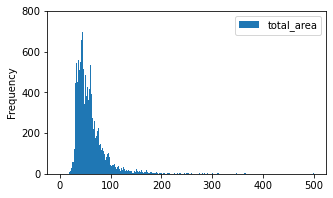

In [24]:
df.plot(y='total_area',kind = 'hist', bins = 500, figsize=(5,3), range = (0,500))
df['total_area'].describe()

#### Вывод: Нормальное распределение для площади, медиана 52 кв.м.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

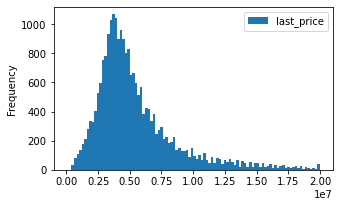

In [25]:
df.plot(y='last_price', kind='hist', bins = 100, figsize=(5,3), range = (0,20000000))

df['last_price'].describe()

#### Вывод: нормальное распределение для цены, медиана 4.65млн

count    23699.000000
mean         2.076459
std          1.069874
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

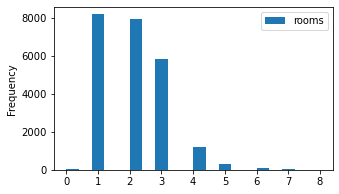

In [26]:
df.plot(y='rooms', kind='hist', bins = 20, figsize=(5,3), range = (0,8))

df['rooms'].describe()

#### Вывод: очень мало квартир-студий (0 комнат) в основном количество комнат 1-3

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

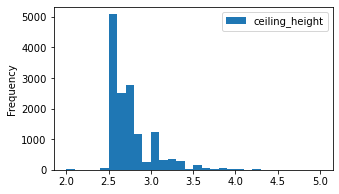

In [27]:
df.plot(y='ceiling_height', kind='hist', bins = 30, figsize=(5,3), range = (2,5))

df['ceiling_height'].describe()

#### Вывод: есть пиковые значения в стандартных размерах потолка - 2, 3 метра

### Построим гистограмму для дней существования объявления 

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

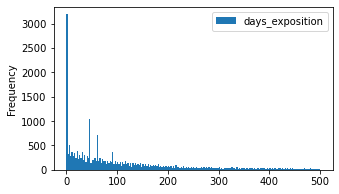

In [28]:
#Строим гистограмму и диаграмму размаха для дней существования объявления, видим выбивающиеся значения в 0.
df.plot(y='days_exposition', kind='hist', bins = 200, figsize=(5,3), range = (0,500))
df['days_exposition'].describe()


#### Вывод: видим выбросы в 4 местах, надо разобратся 

(1.0, 1000.0)

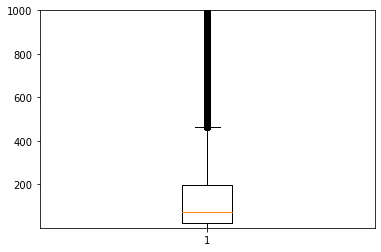

In [29]:
plt.boxplot(df['days_exposition'])
plt.ylim(1,1000)

#### Вывод: большое количество выбросов находящихся за пределом нормального значения (около 450 дней)

45      880
60      538
7       234
30      208
90      204
       ... 
1021      1
1362      1
1105      1
795       1
971       1
Name: days_exposition, Length: 1141, dtype: int64

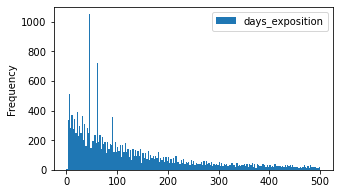

In [30]:
# Избавляемся от значений 0 дней.
data = df[df['days_exposition'] != 0]
data.plot(y='days_exposition', kind='hist', bins = 200, figsize=(5,3), range = (0,500))
data['days_exposition'].value_counts()

#### Скорее всего огромное количество объявлений с длительностью жизни 0 дней - из-за удаления неправильных объявлений модераторами и самими пользователями, просто избавляемся от этих данных. Замечаем что так же есть другие выбивающиеся значения, находим их с помощью value_counts()

In [31]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [56]:
clear_data = df.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')


count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

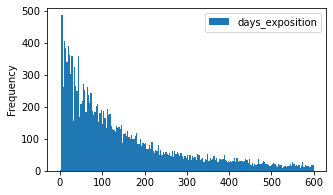

In [33]:
clear_data.plot(y = 'days_exposition', kind = 'hist', bins = 200, figsize = (5,3), range = (0,600))

clear_data['days_exposition'].describe()

(1.0, 1000.0)

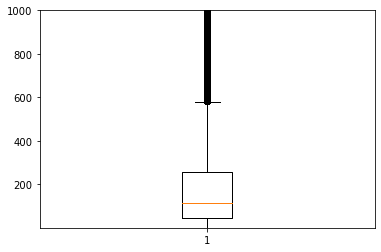

In [34]:
plt.boxplot(clear_data['days_exposition'])
plt.ylim(1,1000)

#### Вывод: после очистки данных среднее значение размещения объявление выросло со 156 до 195 дней, соответственно нормальные значения теперь располагаются в промежутке от 1 до 600 дней

### Изучим зависимость цены от параметров квартиры

0.30196021001472556

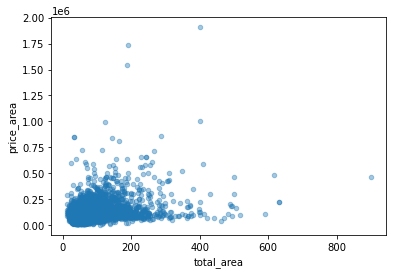

In [35]:
#Зависимость цены от площади
df.plot(y='price_area', x='total_area', kind='scatter', alpha=0.4)
df['price_area'].corr(df['total_area'])

#### Вывод: есть небольшая корреляция между размером площади и ценой одного кв.м.

<AxesSubplot:xlabel='rooms'>

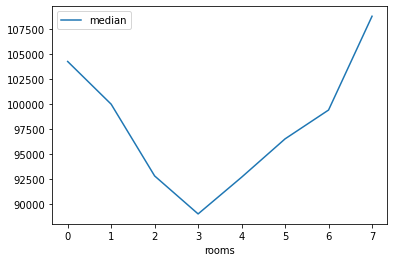

In [58]:
#Зависимость от числа комнат
pivot_table_rooms = df.pivot_table(index ='rooms', values = 'price_area', aggfunc=['median', 'count'])
pivot_table_rooms.columns = ['median','count']
pivot_table_rooms.query('count > 20').plot(y='median')


#### Вывод: самые дешевые кв.м. оказались в квартирах с 3 комнатами

-0.3179507695934346

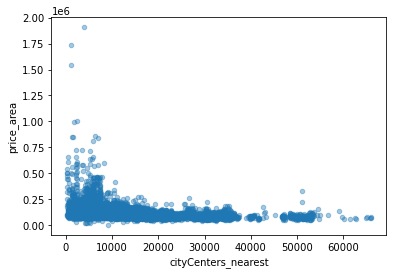

In [37]:
#Зависимость от удаленности от центра
df.plot(y='price_area', x='cityCenters_nearest', kind='scatter', alpha=0.4)
df['price_area'].corr(df['cityCenters_nearest'])

#### Вывод есть небольшая корреляция, чем дальше от центра тем дешевле кв.м.

<AxesSubplot:xlabel='floor_name'>

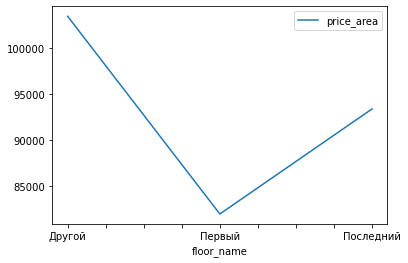

In [38]:
#Зависимость от этажа
pivot_table_floor = df.pivot_table(index='floor_name', values='price_area')
pivot_table_floor.plot(y='price_area')


#### Вывод: самые дешевые кв.м. в квартирах на первом этаже, так же на последнем этаже кв.м. в среднем стоит меньше чем на других этажах

<AxesSubplot:xlabel='day_name'>

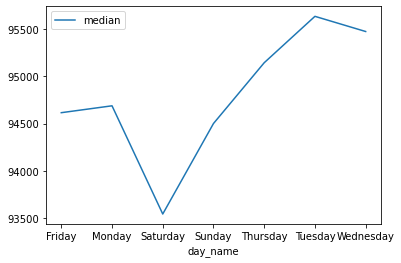

In [39]:
#Зависимость от дня недели
pivot_table_day = df.pivot_table(index='day_name', values='price_area', aggfunc=['median'])
pivot_table_day.columns = ['median']
pivot_table_day.plot(y='median')

#### Вывод: самые высокие цены за кв.м. выставляли в среду и четверг, самые маленькие в субботу

<AxesSubplot:xlabel='month'>

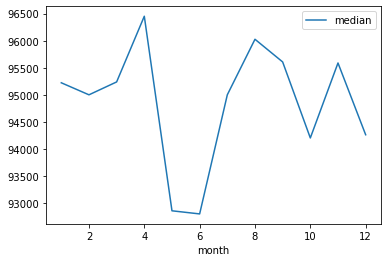

In [40]:
#Зависимость от месяца
pivot_table_month = df.pivot_table(index = 'month', values='price_area',aggfunc=['median'])
pivot_table_month.columns = ['median']
pivot_table_month.plot(y='median')

#### Вывод: самые низкие цены в мае и июле, при этом в апреле самые высокие

,median
year,
2014,107000.000000
2015,93414.634146
2016,91743.119266
2017,92565.088448
2018,95689.655172
2019,103305.785124


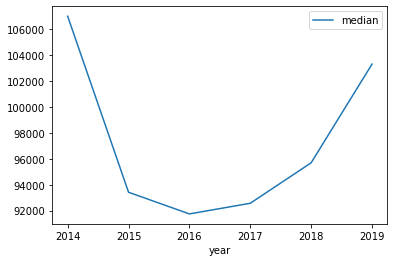

In [41]:
#Зависимость от года
pivot_table_year = df.pivot_table(index = 'year', values='price_area',aggfunc=['median'])
pivot_table_year.columns = ['median']
pivot_table_year.plot(y='median')
pivot_table_year

#### Вывод: в период с 2015-2018 цены резко уапли, затем начали возвращаться к прежней планке

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [42]:
pivot_table_cities = df.pivot_table(index='locality_name', values = 'price_area', aggfunc=['median', 'count', 'mean'])
pivot_table_cities.columns = ['median', 'count', 'mean']
top10 = pivot_table_cities.sort_values(by = 'count', ascending=False).head(10)
top10.sort_values(by='mean')

,median,count,mean
locality_name,,,
Выборг,58158.319871,237,58141.909153
Всеволожск,65789.473684,398,68654.473986
Гатчина,67796.610169,307,68746.146763
Колпино,74723.748474,338,75424.579098
посёлок Шушары,76876.172608,440,78677.364217
посёлок Мурино,85878.462169,522,85752.189195
посёлок Парголово,91642.857143,327,90175.913458
деревня Кудрово,91860.465116,299,92473.547576
Пушкин,100000.000000,369,103125.819291


#### Вывод: самая большая стоимость за квадратный метр в Санкт-Петербурге, а самая маленькая в Выборге

Выясним, какая область входит в центр Санкт-Петербурга

-0.40448599637003596

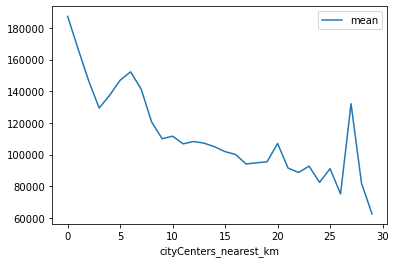

In [43]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(99999)

df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
pivot_table_peterburg = df.query('cityCenters_nearest_km != 99999 and locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_area', aggfunc=['mean'])
pivot_table_peterburg.columns = ['mean']

pivot_table_peterburg.plot()
df['cityCenters_nearest_km'].corr(df['price_area'])

#### Вывод: граница центра находится на 5км 

### Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [44]:
center = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 5')

In [45]:
center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month,year,price_area,cityCenters_nearest_km
count,2835.000000,2.835000e+03,2835.000000,2835.000000,1866.000000,2828.000000,2607.000000,2835.00000,2578.000000,2835.000000,...,2835.000000,2835.000000,1839.000000,2835.000000,2042.000000,2835.000000,2835.000000,2835.000000,2.835000e+03,2835.000000
mean,10.179894,1.506342e+07,96.064526,2.951323,3.162358,6.634371,56.875152,3.97672,14.745155,0.281481,...,3999.201411,1.033862,472.549755,1.295944,458.175808,214.374956,6.422575,2017.153792,1.435311e+05,3.493827
std,6.030686,2.547955e+07,60.793969,1.501033,0.944712,3.500464,38.821059,2.76014,9.195625,0.713163,...,1394.558523,0.967494,325.996391,1.101212,277.010656,275.187549,3.470806,1.130657,9.558905e+04,1.371738
min,0.000000,1.600000e+06,12.000000,0.000000,2.400000,2.000000,3.000000,1.00000,2.000000,0.000000,...,181.000000,0.000000,17.000000,0.000000,22.000000,0.000000,1.000000,2014.000000,1.534527e+04,0.000000
25%,6.000000,6.900000e+06,60.000000,2.000000,2.900000,5.000000,33.000000,2.00000,9.300000,0.000000,...,3169.500000,0.000000,281.000000,0.000000,215.000000,21.000000,3.000000,2017.000000,9.871743e+04,3.000000
50%,10.000000,9.490000e+06,82.000000,3.000000,3.080000,5.000000,48.000000,3.00000,12.000000,0.000000,...,4324.000000,1.000000,431.000000,1.000000,444.000000,102.000000,6.000000,2017.000000,1.220302e+05,4.000000
75%,15.000000,1.465000e+07,113.000000,4.000000,3.307500,7.000000,69.000000,5.00000,17.000000,0.000000,...,5049.000000,2.000000,595.000000,2.000000,667.000000,302.000000,10.000000,2018.000000,1.546529e+05,5.000000
max,50.000000,7.630000e+08,631.200000,19.000000,32.000000,25.000000,409.000000,25.00000,107.000000,5.000000,...,5992.000000,3.000000,2295.000000,3.000000,1293.000000,1572.000000,12.000000,2019.000000,1.907500e+06,5.000000


<AxesSubplot:xlabel='rooms'>

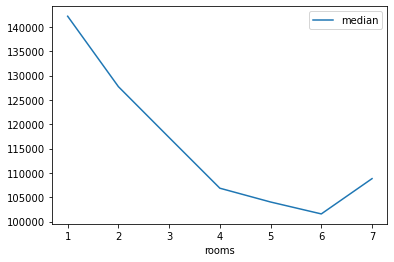

In [46]:
#Влияние количества комнат на цену
pivot_table_center_rooms = center.pivot_table(index='rooms', values='price_area', aggfunc=['median', 'count'])
pivot_table_center_rooms.columns = ['median', 'count']
pivot_table_center_rooms = pivot_table_center_rooms.query('count > 20')
pivot_table_center_rooms.plot(y='median')


#### Вывод: в центре питера цена за кв.м. зависимость от кол-ва комнат отличается от общей, скорее всего из-за особенностей домов в центре

,median,count
floor_name,,
Другой,125482.625483,1979
Первый,109258.747752,328
Последний,118521.583185,528


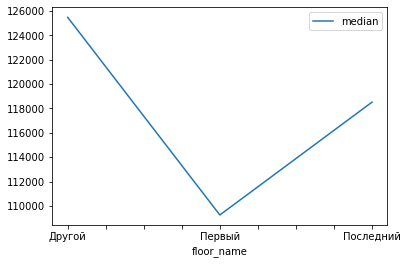

In [61]:
pivot_table_center_floor = center.pivot_table(index='floor_name', values='price_area', aggfunc=['median', 'count'])
pivot_table_center_floor.columns = ['median', 'count']
pivot_table_center_floor = pivot_table_center_floor.query('count > 20')
pivot_table_center_floor.plot(y='median')
pivot_table_center_floor


#### Вывод: зависимость от этажа в центре не изменилась по отношению к общей

,median,count
cityCenters_nearest_km,,
0,138536.993745,86
1,123966.942149,240
2,116363.636364,307
3,110080.006872,526
4,126086.956522,907
5,126041.666667,769


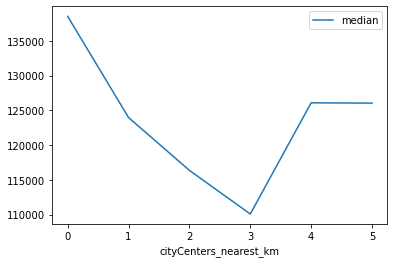

In [62]:
pivot_table_center_km = center.pivot_table(index='cityCenters_nearest_km', values='price_area', aggfunc=['median', 'count'])
pivot_table_center_km.columns = ['median', 'count']
pivot_table_center_km = pivot_table_center_km.query('count > 20')
pivot_table_center_km.plot(y='median')
pivot_table_center_km

#### Вывод: почему то самая маленькая цена в 3км от центра, возможно из-за особенностей города

<AxesSubplot:xlabel='day_name'>

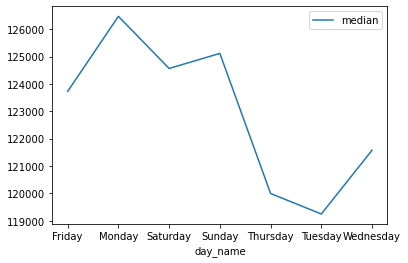

In [49]:
pivot_table_center_day = center.pivot_table(index='day_name', values='price_area', aggfunc=['median'])
pivot_table_center_day.columns = ['median']
pivot_table_center_day.plot(y='median')

#### Вывод: существенная разница в зависимости цены от дней недели, по сравнению со всеми даннами

<AxesSubplot:xlabel='month'>

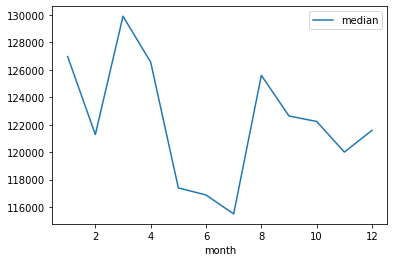

In [50]:
pivot_table_center_month = center.pivot_table(index = 'month', values='price_area',aggfunc=['median'])
pivot_table_center_month.columns = ['median']
pivot_table_center_month.plot(y='median')

#### Вывод: нет осбой разницы в зависимости цены от дней недели, по сравнению со всеми данными

,median,count
year,,
2014,153571.428571,23
2015,117420.484389,264
2016,114283.036401,398
2017,120042.216312,1018
2018,124750.000000,833
2019,135483.870968,299


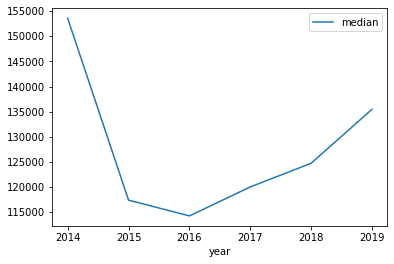

In [51]:
pivot_table_center_year = center.pivot_table(index = 'year', values='price_area',aggfunc=['median','count'])
pivot_table_center_year.columns = ['median','count']
pivot_table_center_year = pivot_table_center_year.query('count > 20')
pivot_table_center_year.plot(y='median')
pivot_table_center_year

#### Вывод: такой же график зависимости цены от года, по сравнению со всеми данными

## Итог

Общая статистика может не отображать статистику в конкретном городе и конкретном регионе города, есть факторы которые не учитываются в имеющихся данных. Из графиков можно сделать вывод, что самое выгодное время для выставления объявления о продаже недвижимости это Апрель, так же в большинстве случев лучше всего выставлять в четверг.
   

Так же можно сделать вывод, что самая малостоящая недвижимость - трехкомнатная квартира на первом этаже, а самые дорогие - студии и однокомнатные квартиры на средних этажах дома.


После отчистки данных было выявлено, что нормальный срок продажи квартиры от 1 до 600 дней. 
   

 Так же стоит учитывать провал в ценах квартир в период с 2015-2018 год, так как наши выводы стриолись на статистике за все время, могут быть искажения в определенных результатах, например отличие стоимости квартир по дням недели в Санкт-Петербурге.